In [ ]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [ ]:
data=pd.read_csv("boston.csv")
# print(data.head())
print(data.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


(354, 13)
(152, 13)
(354,)
(152,)


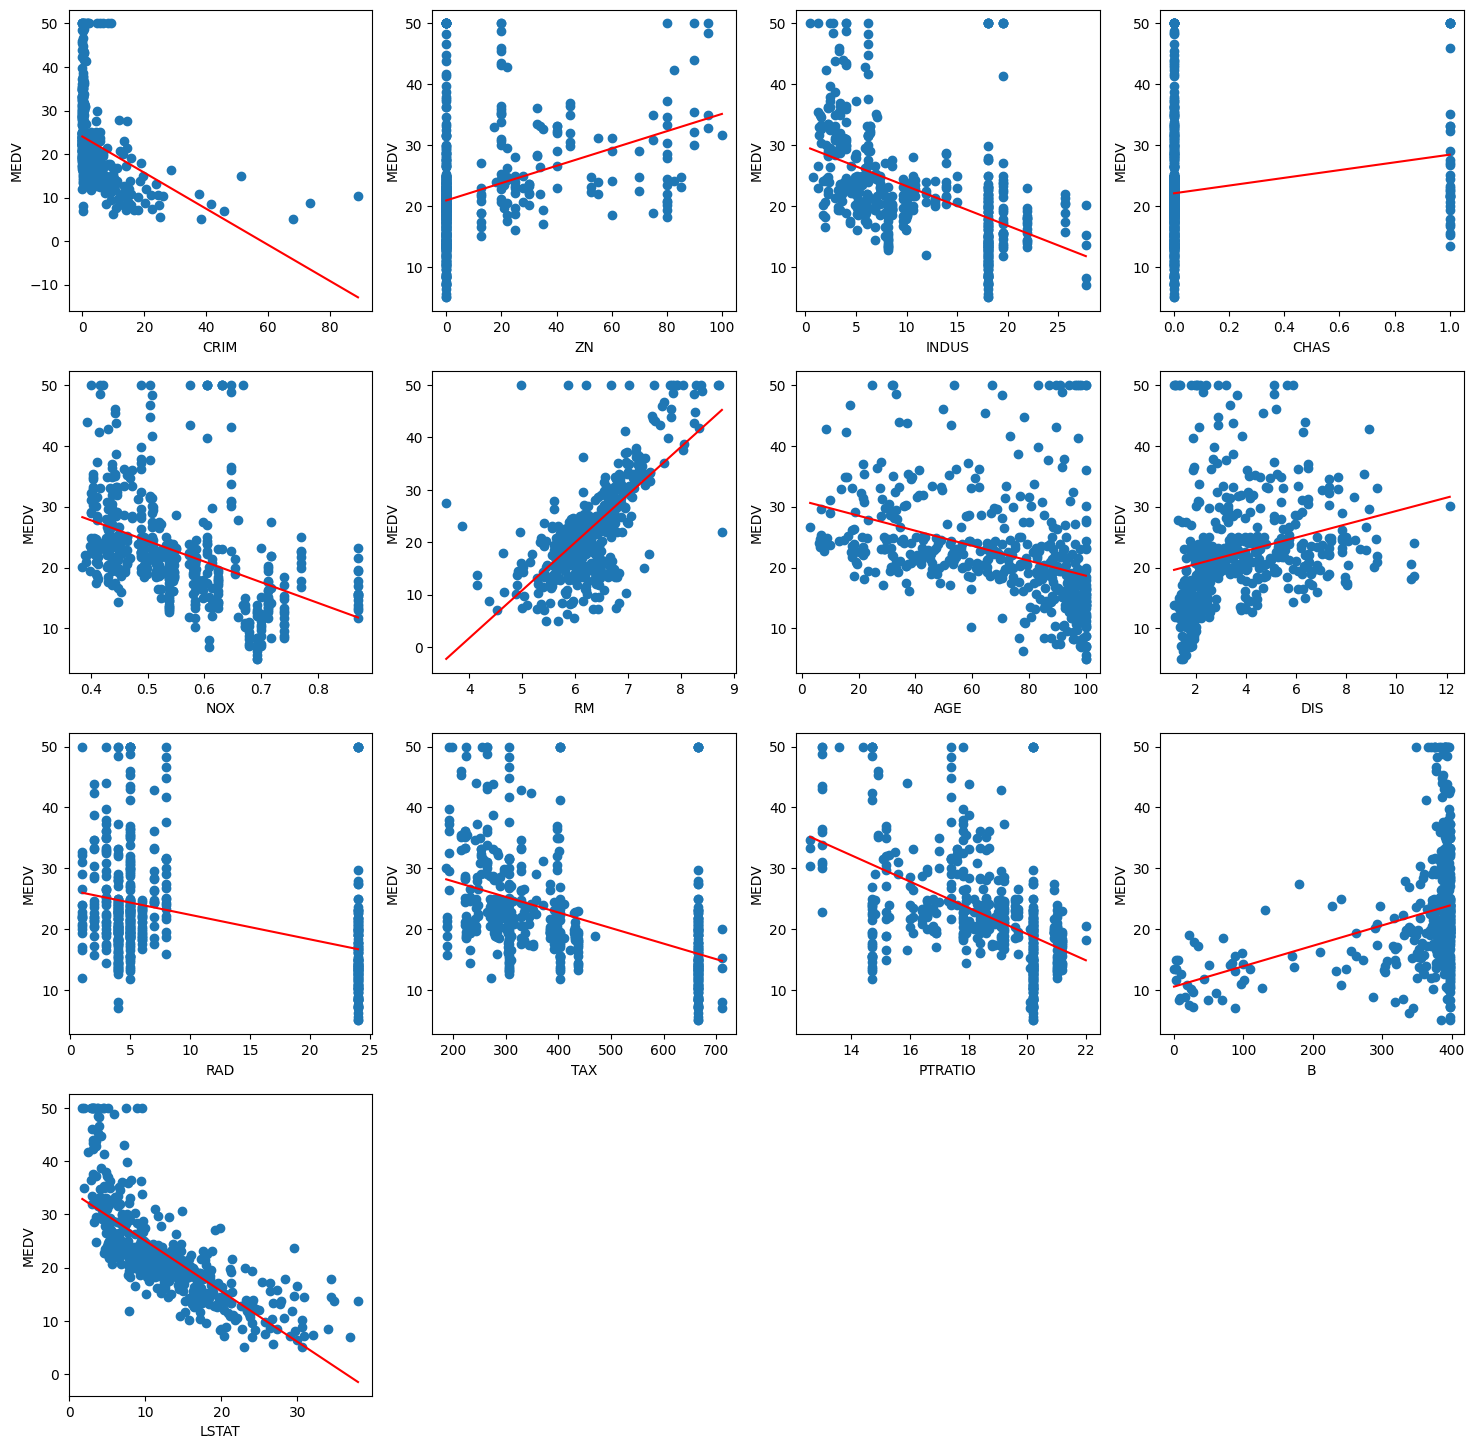

In [ ]:
features=data.iloc[:,0:-1]
# print(features)
Y=data.iloc[:,-1]

#show features with Regression
plt.figure(figsize=(18, 18))

for i, idx in enumerate(data.columns[0:13]):
    plt.subplot(4,4,i+1)
    x = data[idx]
    y = data['MEDV']
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('MEDV')


#Split data to Train & Test
X_train,X_test,Y_train,Y_test=train_test_split(features,Y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
scaler.transform(X_test)

array([[-0.39454262, -0.49997924, -1.12239824, ..., -0.70822867,
         0.17086147, -0.72160487],
       [ 0.70419882, -0.49997924,  1.00534187, ...,  0.77714428,
         0.0648977 , -0.41177872],
       [-0.38890688, -0.49997924,  0.4025299 , ..., -0.93328518,
         0.38758427, -0.27454978],
       ...,
       [ 1.61285743, -0.49997924,  1.00534187, ...,  0.77714428,
         0.42454294,  2.59876943],
       [-0.34350332, -0.49997924, -0.1687812 , ..., -0.03305915,
         0.42454294, -1.11772962],
       [-0.39902507, -0.49997924, -1.27417512, ...,  0.10197476,
         0.39202867, -1.02294263]])

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.196172  0.382073 -0.049364  0.416560 -0.188280  0.329927   
ZN      -0.196172  1.000000 -0.529392 -0.063863 -0.523572  0.319260 -0.583885   
INDUS    0.382073 -0.529392  1.000000  0.044224  0.750218 -0.392969  0.629257   
CHAS    -0.049364 -0.063863  0.044224  1.000000  0.043748  0.088125  0.067269   
NOX      0.416560 -0.523572  0.750218  0.043748  1.000000 -0.279202  0.740052   
RM      -0.188280  0.319260 -0.392969  0.088125 -0.279202  1.000000 -0.235839   
AGE      0.329927 -0.583885  0.629257  0.067269  0.740052 -0.235839  1.000000   
DIS     -0.355840  0.658331 -0.686848 -0.085492 -0.765753  0.183857 -0.761543   
RAD      0.603880 -0.314833  0.578459  0.022338  0.627188 -0.179242  0.440578   
TAX      0.560570 -0.327834  0.719038 -0.017156  0.683445 -0.275242  0.502429   
PTRATIO  0.264780 -0.392838  0.388353 -0.072683  0.179046 -0.385526  0.239729   
B       -0.299525  0.164641 

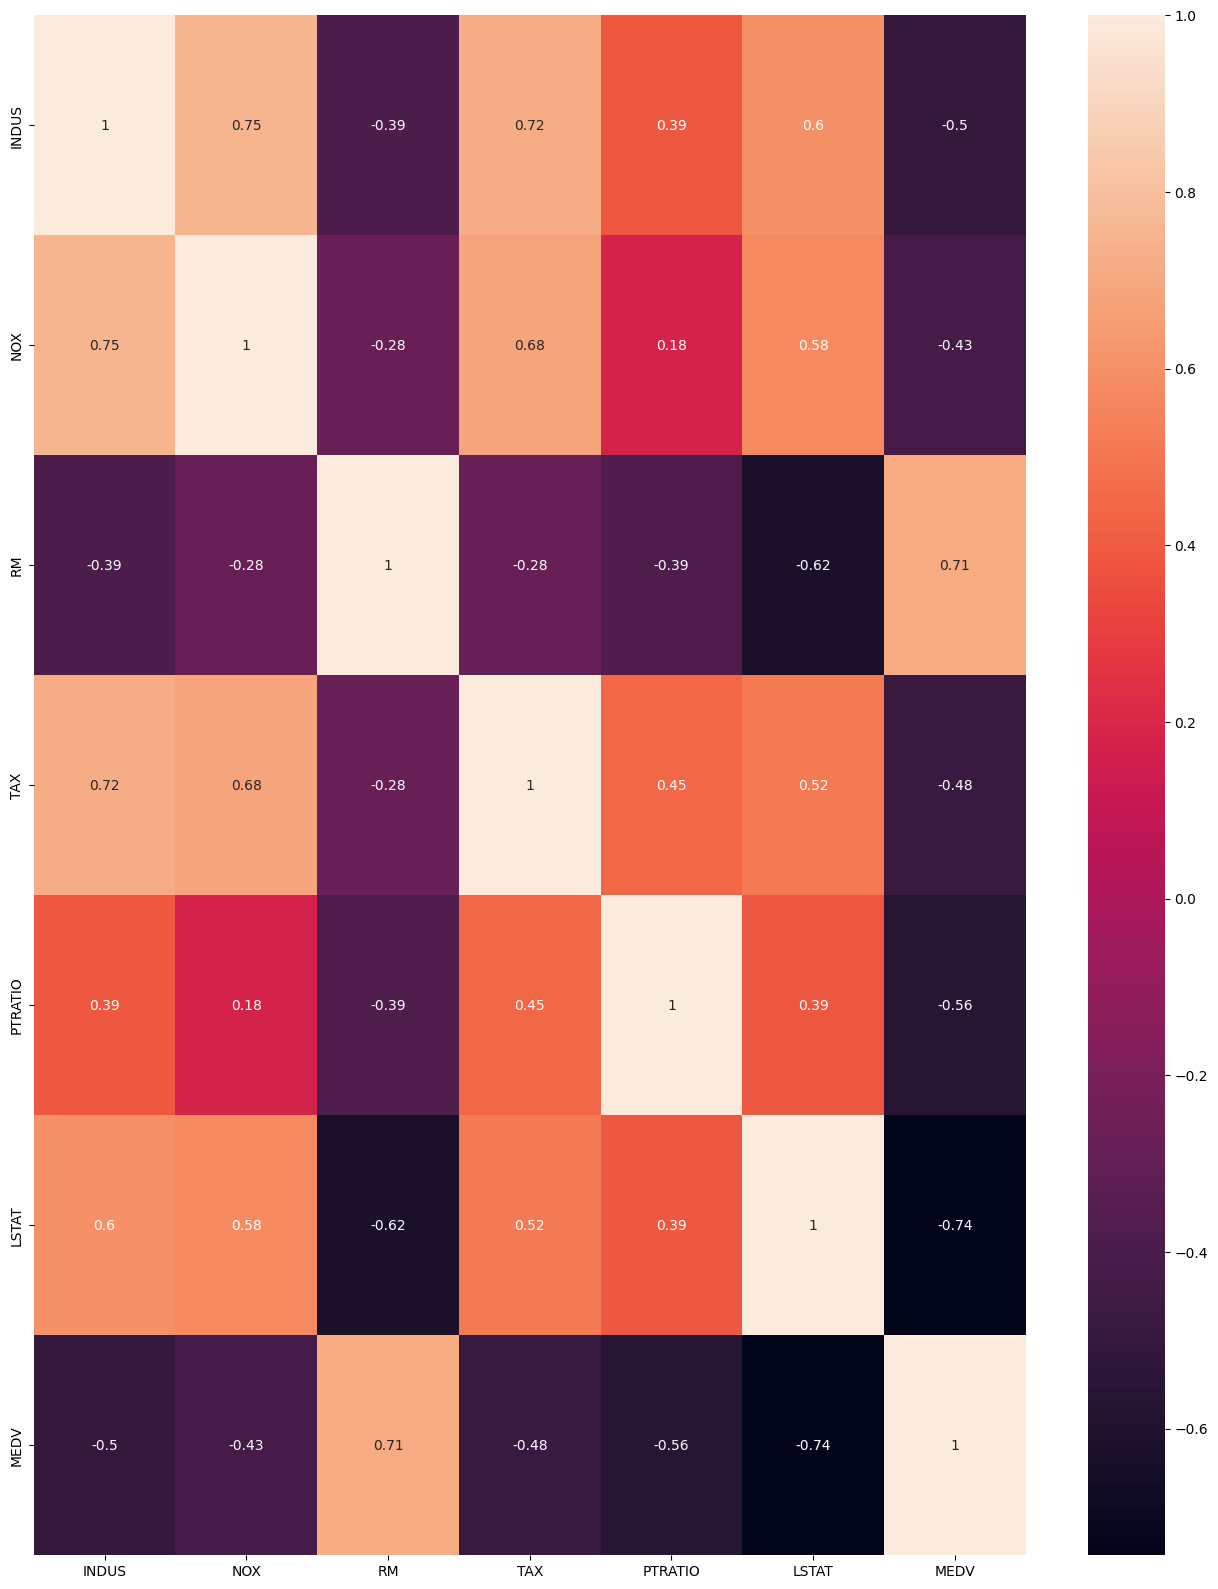

In [ ]:
plt.figure(figsize=(16,20))
corr_matrix = pd.concat([X_train, Y_train], axis=1).corr()
print(corr_matrix)
top_feature = corr_matrix.index[abs(corr_matrix['MEDV']) > .4]
top_corr = pd.concat([X_train, Y_train], axis=1)[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature=top_feature.delete(-1)
X_train=X_train[top_feature]
X_test=X_test[top_feature]

In [ ]:
model2=XGBRegressor()
model2.fit(X_train,Y_train)
TestPrediction2=model2.predict(X_test[top_feature])
print("Test Mean square error of RandomForest: ",mean_squared_error(Y_test,TestPrediction2))
Train_Prediction2=model2.predict(X_train)
print("Train Mean square error of RandomForest: ",mean_squared_error(Y_train,Train_Prediction2))
print("Model Accuracy(%): \t" + str(r2_score(Y_test, TestPrediction2) * 100) + "%")


Test Mean square error of RandomForest:  19.179097062830454
Train Mean square error of RandomForest:  0.003022333478953998
Model Accuracy(%): 	76.96633457555978%
